NAME-KUSHAGRA SINGHAL
ROLL NUMBER-240102056
TASK 1

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
df=pd.read_csv('Dataset.csv')

In [210]:
print(df.shape)
df.isna().sum()

(649, 33)


school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

Given Csv has 649 rows and 33 columns with some missing values in some columns,note that missing values of given feature values are-
Feature_1     38
Feature_2     46
Feature_3     39

QUESTION 1- Use EDA techniques (histograms, scatter plots, correlation heatmaps, etc.) to guess the 
original meaning of these features
 Prepare short visual / textual justifications for each guess (e.g., “Feature_A likely represents 
weight due to its strong correlation with height”)

In [211]:
df['Feature_1'].describe()

count    611.000000
mean      16.747954
std        1.216812
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: Feature_1, dtype: float64

REPLACING THE MISSING OR NULL VALUES BY MEAN VALUE OR 17 IN THE GIVEN FEATURE 1 COLUMN,We also found that the given data lie between the range from 15 to 22 and with the mean and median value of 17,so most of the data lie in range of 17-20 ,with outliers of data as 21 and 22.

In [212]:
df.fillna({
    'Feature_1':17
},inplace=True)


plotting box plot and histogram to showcase and analyse the Data of feature 1.

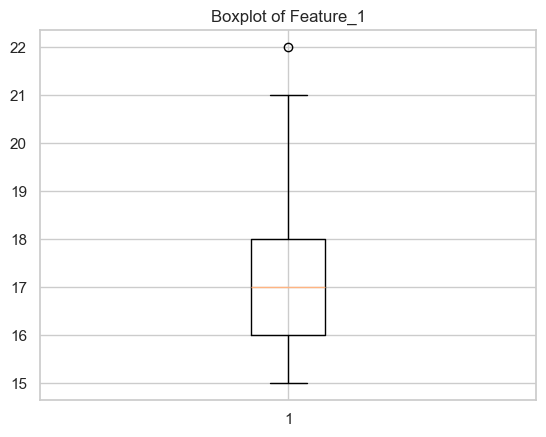

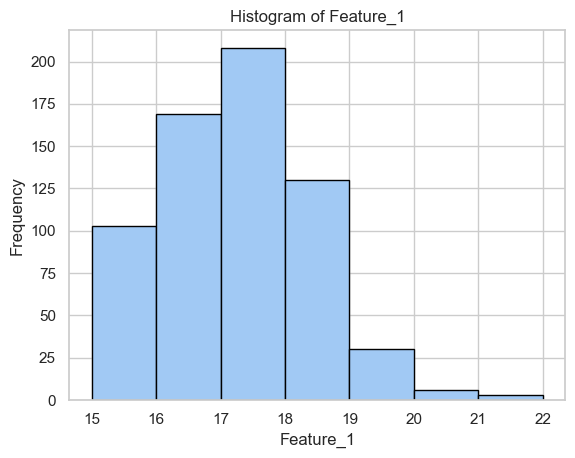

In [213]:
plt.boxplot(df['Feature_1'])
plt.title('Boxplot of Feature_1')
plt.show()
plt.hist(df['Feature_1'], bins=7, edgecolor='black')
plt.title('Histogram of Feature_1')
plt.xlabel('Feature_1')
plt.ylabel('Frequency')
plt.show()

THESE PLOTS SHOW THAT MOST OF THE DATA LIE BETWEEN THE RANGE OF 15 to 20,with very less values in range of 20 to 22

Since most of the data is lying in the given range are we are analysing data of the high school student's which are generally in age group of 15-20 so FEATURE 1-will most likely represent the AGE of students in intgeral value,to further analyse and relate plotting the box plot with alcohol consumption and relating the parameters.

C:\Users\kusha\AppData\Local\Temp\ipykernel_4548\282569199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dalc', y='Feature_1', data=df, palette='pastel')


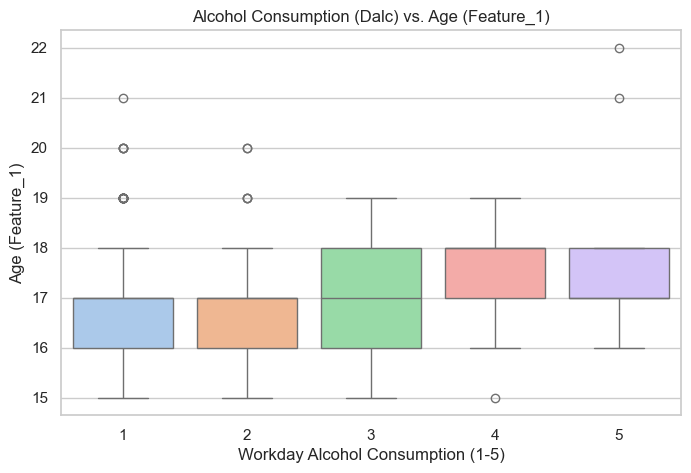

In [214]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Dalc', y='Feature_1', data=df, palette='pastel')
plt.title('Alcohol Consumption (Dalc) vs. Age (Feature_1)')
plt.xlabel('Workday Alcohol Consumption (1-5)')
plt.ylabel('Age (Feature_1)')
plt.show()

High alcohol consumption value 3 to 5 is generally seen for  ages 17-18 which can be considered as above the legal age of drinking ,it is increasing with age

So Feature 1 represents age of students in this Dataframe

In [215]:
df[['Feature_2']].describe()

,Feature_2
count,603.000000
mean,1.913765
std,0.830798
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


for missing values replacing the data with mean ,we also get to know that feature 2 lies in the range of 1 to 4,with it's mean and median equal to 2 in value.

In [216]:
df.fillna({
    'Feature_2': 2},inplace=True)


plotting pie plot of feature_2 and analysing each amount of data

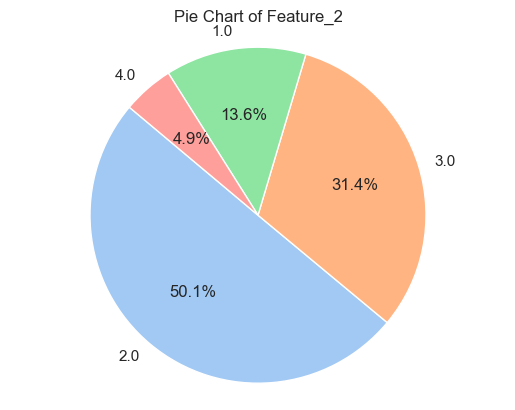

In [217]:
plt.pie(df['Feature_2'].value_counts(), labels=df['Feature_2'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Feature_2')
plt.axis('equal')
plt.show()

Trying to analyse feature 2 with health of student

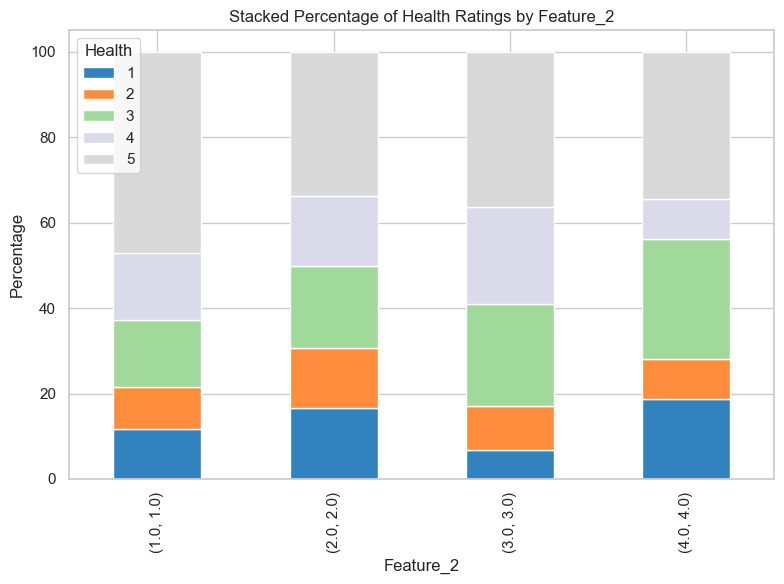

In [218]:

percent_df = (
    df.groupby(['Feature_2', 'health']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0) 
)
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of Health Ratings by Feature_2')
plt.ylabel('Percentage')
plt.xlabel('Feature_2')
plt.legend(title='Health', loc='upper left')
plt.tight_layout()
plt.show()


Health is almost same for various values of feature 2 so health is not much related to feature 2,So trying to relate academic performance with feature 2,to relate this relate with final performance that is G3 of the student.

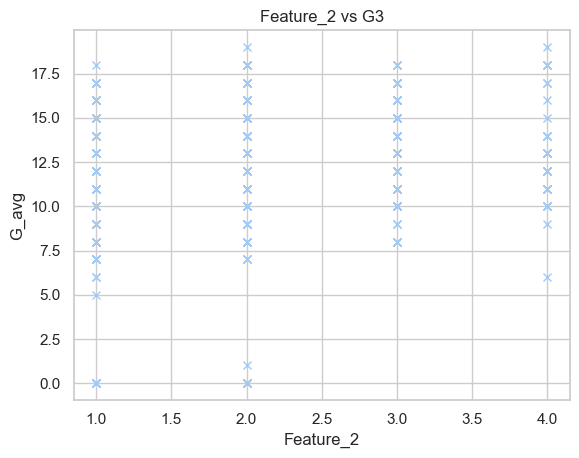

In [219]:
plt.plot(df['Feature_2'], df['G3'], 'x')
plt.title('Feature_2 vs G3')
plt.xlabel('Feature_2')
plt.ylabel('G_avg')
plt.show()

For high value of feature 2,that is 3 or 4 we can see G_avg value is also high we can see that feature 2 is related to average marks scored by student in 3 examination.

Relating Feature 2 with Failures.

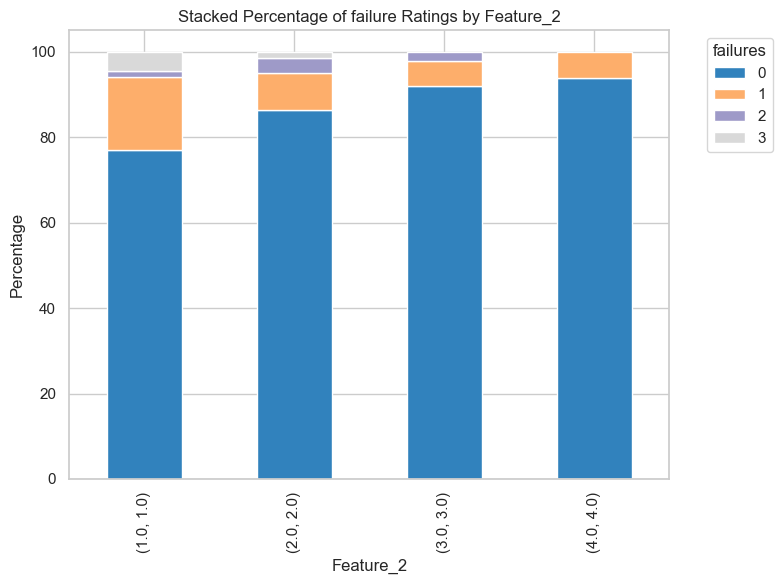

In [220]:

percent_df = (
    df.groupby(['Feature_2', 'failures']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  
)
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of failure Ratings by Feature_2')
plt.ylabel('Percentage')
plt.xlabel('Feature_2')
plt.legend(title='failures', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

THIS concludes that for low value of Feature 2 that is 1 and 2,amount of failure value is more while for high values of Feature 2 there amount is low this tells feature 2 is related to academics.

So we conclude that Feature 2 is IQ rating or  overall academic performance or Study hours devoted by student,as it increases with the increase of amount of grades and decreases with failures of the student.

In [221]:
df[['Feature_3']].describe()

,Feature_3
count,610.000000
mean,2.262295
std,1.285279
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,5.000000


feature 3 is between 1 to 5 values with min value as 1 and max value as 5,so filling the missing values with the median that is 2 in the feature 3.

In [222]:
df['Feature_3'].fillna(df['Feature_3'].median(), inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_4548\1802031655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Feature_3'].fillna(df['Feature_3'].median(), inplace=True)


Trying to relate feature 3 with academic parameters like G3 used above

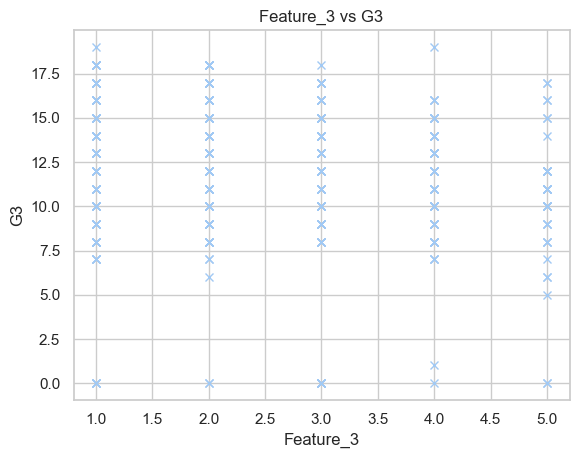

In [223]:
plt.plot(df['Feature_3'], df['G3'], 'x')
plt.title('Feature_3 vs G3')
plt.xlabel('Feature_3')
plt.ylabel('G3')
plt.show()

We can see that it is evenly spread among all values of Feature 3 we can't tell if feature 3 is related to academic parameter

Trying to relate it with lifestyle and behavorial parameters like famrel and goout and freetime after school

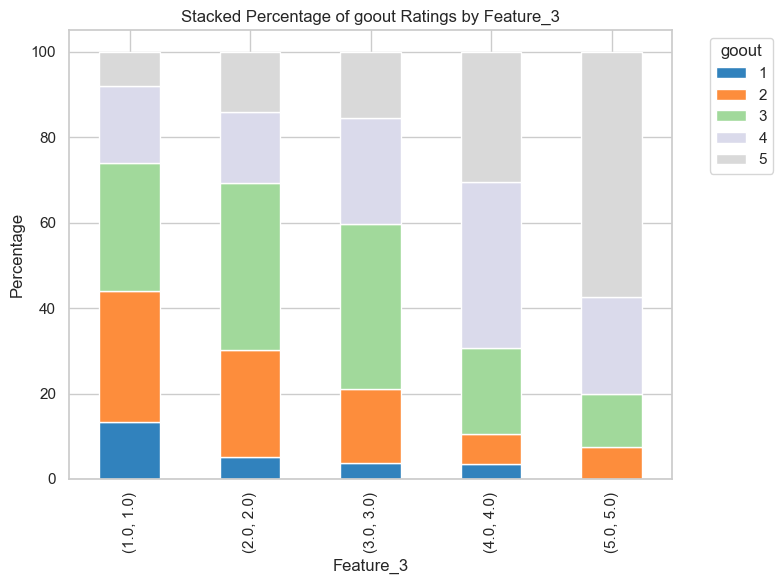

In [224]:

percent_df = (
    df.groupby(['Feature_3', 'goout']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0) )

percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of goout Ratings by Feature_3')
plt.ylabel('Percentage')
plt.xlabel('Feature_3')
plt.legend(title='goout', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This shows this have high percentage rating for high value of feature 3,it increases as feature 3 increases

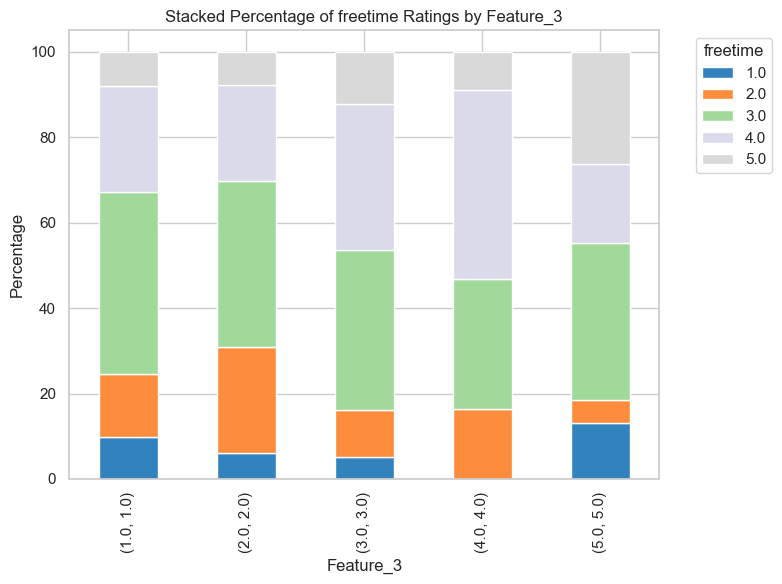

In [225]:

percent_df = (
    df.groupby(['Feature_3', 'freetime']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0) ) 


percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of freetime Ratings by Feature_3')
plt.ylabel('Percentage')
plt.xlabel('Feature_3')
plt.legend(title='freetime', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Now trying to relate with extracuricullar activites of student and the Feature 3.

<Figure size 1000x600 with 0 Axes>

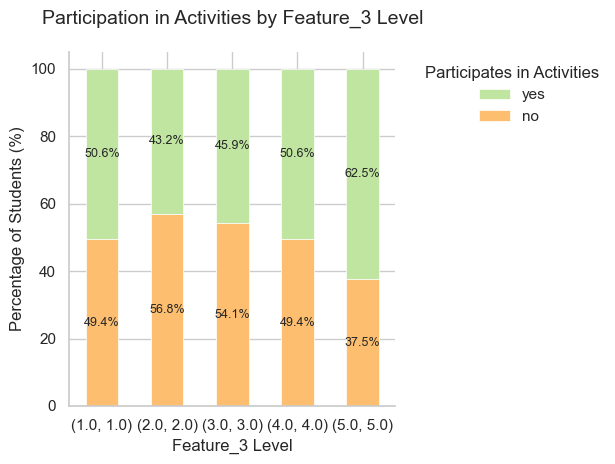

In [226]:


activities_df = (
    df.groupby(['Feature_3', 'activities']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)
)


palette = sns.color_palette("Spectral", n_colors=len(activities_df.columns))

plt.figure(figsize=(10, 6))
ax = activities_df.plot(kind='bar', 
                       stacked=True,
                       color=palette,
                       edgecolor='white',
                       linewidth=0.5)

plt.title('Participation in Activities by Feature_3 Level', fontsize=14, pad=20)
plt.xlabel('Feature_3 Level', fontsize=12)
plt.ylabel('Percentage of Students (%)', fontsize=12)
plt.xticks(rotation=0)


handles, labels = ax.get_legend_handles_labels()
legend = plt.legend(reversed(handles), 
                   reversed(labels),
                   title='Participates in Activities',
                   bbox_to_anchor=(1.05, 1),
                   loc='upper left',
                   frameon=False)

for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 10 else '' 
              for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=9)


plt.tight_layout()
sns.despine()
plt.show()

It can be seen that as the value of Feature 3 increases the value of percentage of students involved in extra curriculars increases so Feature 3 is basically quality of relationship or ability to make friend or extrovert rating of person or ability to socialise of the person.

ANSWER TO LEVEL 2- Identify all features with missing values, propose and apply appropriate imputation 
strategies for each Justify your choice briefly for each variable with nulls

identifying all the features with null value ,also note that i have already filled the feature 1,feature 2 and feature 3 with thier median values or mean values and provided it's explanation.

In [227]:
df.isnull().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1      0
Feature_2      0
Feature_3      0
romantic       0
dtype: int64

So we get that the missing columns are -famsize,fedu,traveltime,higher,freetime,absences feature 1 ,feature 2,feature 3 for the given dataframe during the level 1 and already provided the explanation for them.

analysing famsize column

In [228]:
df['famsize'].describe()

count     599
unique      2
top       GT3
freq      424
Name: famsize, dtype: object

only Two values are present GT3 and LE3 so filling the missing values with modal values as they are for most of the data and rest data are related to it 

In [229]:
df['famsize'].fillna(df['famsize'].mode()[0], inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_4548\588938378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['famsize'].fillna(df['famsize'].mode()[0], inplace=True)


for Fedu and traveltime

In [230]:
df['Fedu'].describe()

count    576.000000
mean       2.303819
std        1.111076
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

so Filling Fedu witht the median value will be most appropriate as median value is integral and it close to mean value for the data.

In [231]:
df['Fedu'].fillna(df['Fedu'].median(), inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_4548\3830095925.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fedu'].fillna(df['Fedu'].median(), inplace=True)


In [232]:
df['traveltime'].describe()

count    576.000000
mean       1.574653
std        0.744592
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

finding mean,median and mode for data

In [233]:
mean = df['traveltime'].mean()
median = df['traveltime'].median()
mode = df['traveltime'].mode()[0]
print(mean)
print(median)
print(mode)

1.5746527777777777
1.0
1.0


so Mean,median and mode of data are all close to 1 so filling the missing value with 1 for data gives-

In [234]:
df['traveltime'].fillna(df['traveltime'].median(), inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_4548\2828264821.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['traveltime'].fillna(df['traveltime'].median(), inplace=True)


In [235]:
df['freetime'].describe()

count    604.000000
mean       3.172185
std        1.044684
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

for free time we have data from 1 to 5,with mean value and median value both close to 3 hence filling it by 3

In [236]:
df['freetime'].fillna(df['freetime'].median(), inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_4548\2698326315.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['freetime'].fillna(df['freetime'].median(), inplace=True)


In [237]:
df['higher'].describe()

count     573
unique      2
top       yes
freq      509
Name: higher, dtype: object

For higher column only Two values are possible Yes or No but the frequency of yes in the data is much more ,filling with yes is good

In [238]:
df['higher'].fillna(df['higher'].mode()[0], inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_4548\1793172837.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['higher'].fillna(df['higher'].mode()[0], inplace=True)


In [239]:
df['absences'].describe()

count    580.000000
mean       3.746552
std        4.732890
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

absences data lie from 0 to 32 range with mean value of 3.74 and median of 2 and 75% of data if below 6 so filling the data with the integer value of 2 that is median of data is best

In [240]:
df['absences'].fillna(df['absences'].median(), inplace=True)

C:\Users\kusha\AppData\Local\Temp\ipykernel_4548\740391647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['absences'].fillna(df['absences'].median(), inplace=True)


Filling missing values of G2 note that analying data of csv we get that data in G3 is roughly equal to corresponding to average of value of G1 and G2 column so we can find the G2 missing column by 2*G3-G1 corresponding data

In [241]:

df['G2'] = df.apply(lambda row: 2 * row['G3'] - row['G1'] if pd.isna(row['G2']) else row['G2'], axis=1)

df.to_csv('Dataset_updated.csv', index=False)


ANSWERING LEVEL 3

1st question-Effect of internet access(basically the internet column of csv) on the academic perfomance of a high schooler and the romantic relationship,so i will use internet column and G3 column

C:\Users\kusha\AppData\Local\Temp\ipykernel_4548\1381408634.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


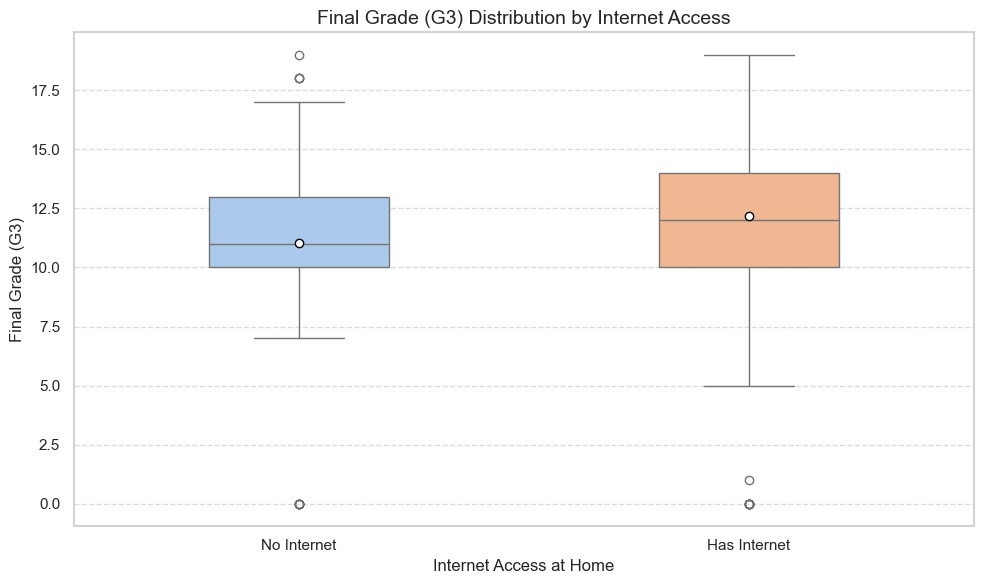

In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Dataset.csv')

# Create the plot
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(
    x='internet', 
    y='G3', 
    data=df, 
    palette='pastel', 
    width=0.4,
    showmeans=True,  # Show mean as a green line
    meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black'}
)


# Customize the plot
plt.title('Final Grade (G3) Distribution by Internet Access', fontsize=14)
plt.xlabel('Internet Access at Home', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Internet', 'Has Internet'])

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This graph tells that the student with internet access have more median value as compared to the ones without internet so this tells internet can help student in certain aspect to improve grades.

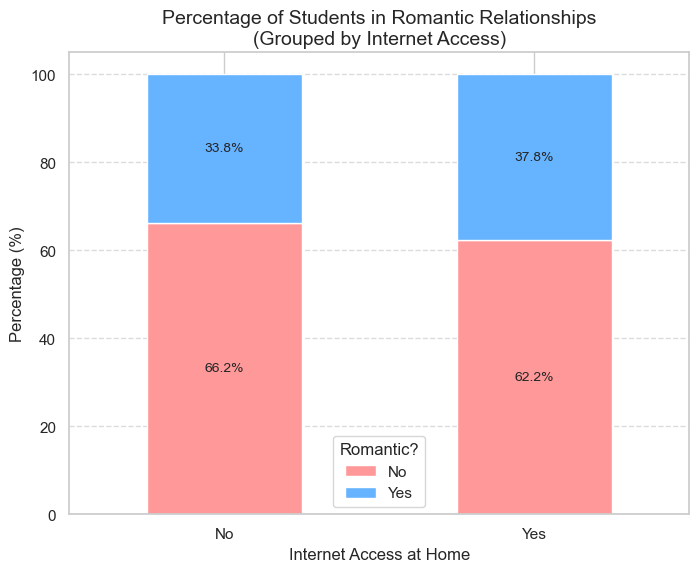

In [243]:

cross_tab = pd.crosstab(df['internet'], df['romantic'])

cross_tab_perc = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

cross_tab_perc.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'], figsize=(8, 6))

plt.title('Percentage of Students in Romantic Relationships\n(Grouped by Internet Access)', fontsize=14)
plt.xlabel('Internet Access at Home', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Romantic?', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, (idx, row) in enumerate(cross_tab_perc.iterrows()):
    y_offset = 0
    for perc in row:
        plt.text(i, y_offset + perc/2, f'{perc:.1f}%', 
                 ha='center', va='center', fontsize=10)
        y_offset += perc

plt.show()

Not much inference can be produced by plotting internet access with romantic relationship

2nd point-investigating the final result G3 with sex and the type of school attended(GP OR MS)

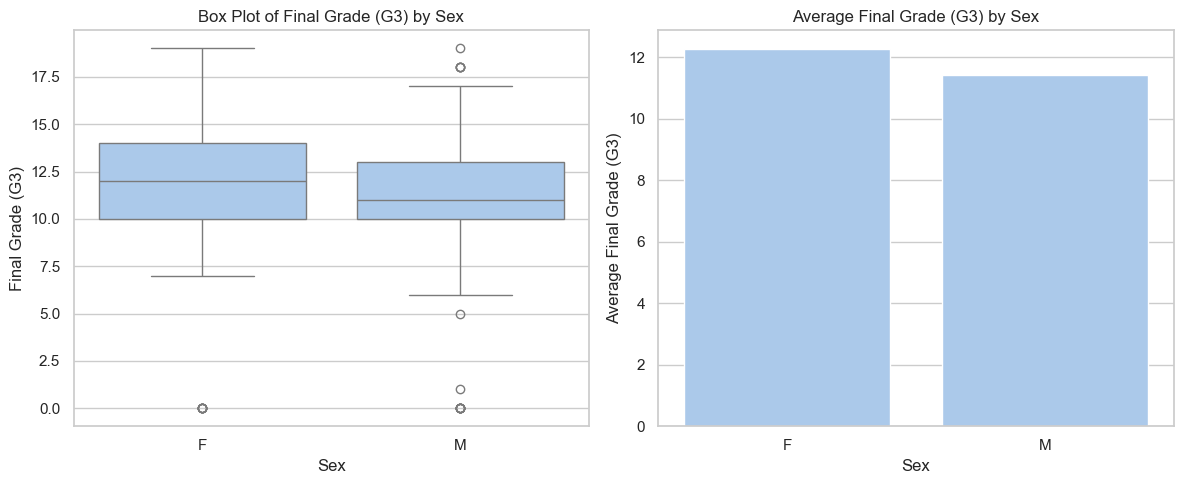

In [244]:

plt.figure(figsize=(12, 5))

# Box Plot: Distribution of G3 by Sex
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='G3', data=df)
plt.title('Box Plot of Final Grade (G3) by Sex')
plt.xlabel('Sex')
plt.ylabel('Final Grade (G3)')

# Bar Plot: Average G3 by Sex
plt.subplot(1, 2, 2)
avg_g3_by_sex = df.groupby('sex')['G3'].mean().reset_index()
sns.barplot(x='sex', y='G3', data=avg_g3_by_sex)
plt.title('Average Final Grade (G3) by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Final Grade (G3)')

# Show plots
plt.tight_layout()
plt.show()


IT can be seen that final grade are better of Female students as compared to there male counterpart,now analysing grade vs school type

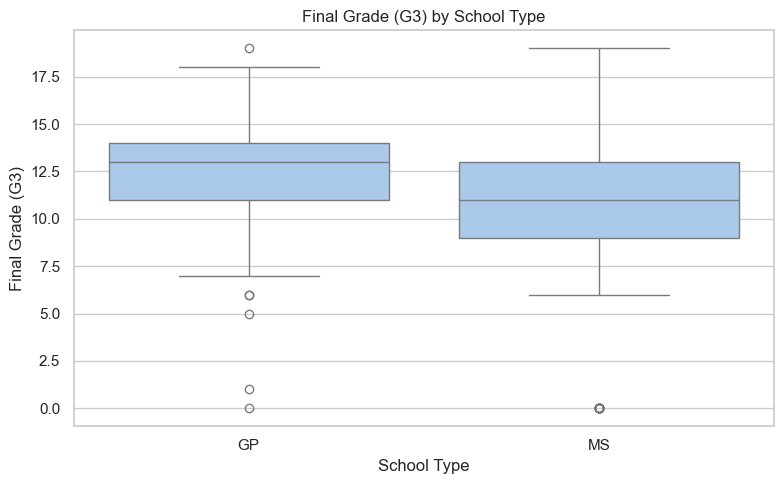

In [245]:

plt.figure(figsize=(8, 5))

# Box Plot: Distribution of G3 by School Type
sns.boxplot(x='school', y='G3', data=df)
plt.title('Final Grade (G3) by School Type')
plt.xlabel('School Type')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()


GP school outperformed the MS school in terms of grades.

3rd point- ANALYSING TRAVELTIME WITH ADDRESS(U OR R) AND ALSO ANALYSING THE EFFECT OF TRAVELTIME WITH GRADES

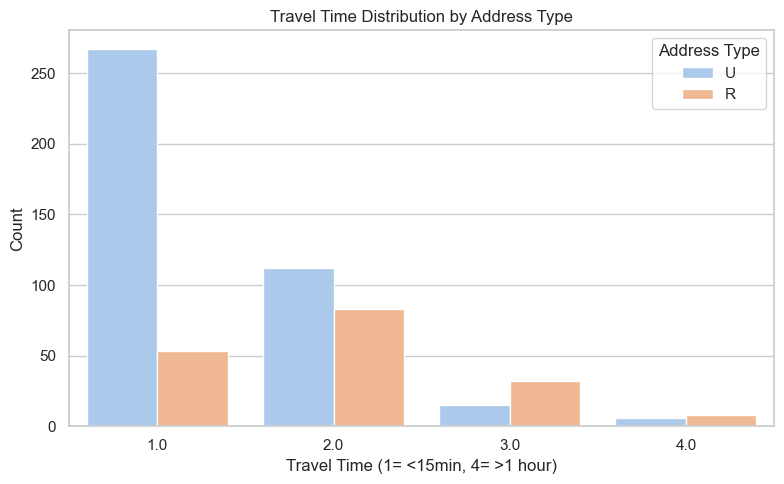

In [246]:

plt.figure(figsize=(8, 5))
sns.countplot(x='traveltime', hue='address', data=df)
plt.title('Travel Time Distribution by Address Type')
plt.xlabel('Travel Time (1= <15min, 4= >1 hour)')
plt.ylabel('Count')
plt.legend(title='Address Type')

plt.tight_layout()
plt.show()


This plot shows that students coming from rural areas have to travel more as compared to students with urban area.
Now showing effect of travel time with grades

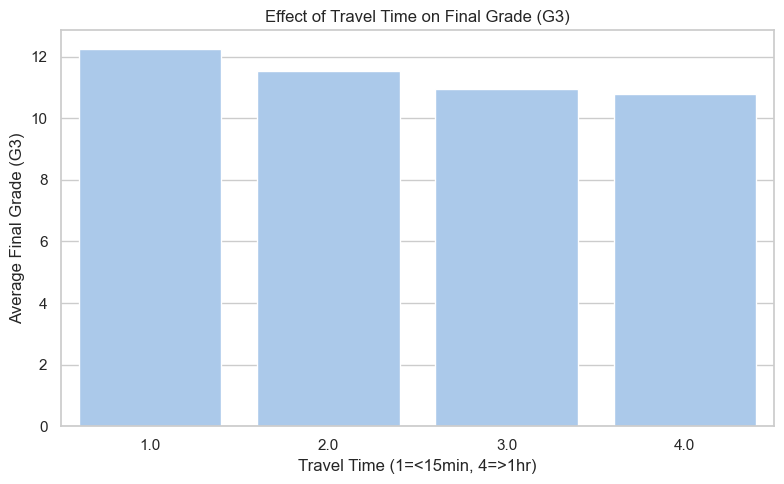

In [247]:

plt.figure(figsize=(8, 5))


avg_g3_by_traveltime = df.groupby('traveltime')['G3'].mean().reset_index()

sns.barplot(x='traveltime', y='G3', data=avg_g3_by_traveltime)
plt.title('Effect of Travel Time on Final Grade (G3)')
plt.xlabel('Travel Time (1=<15min, 4=>1hr)')
plt.ylabel('Average Final Grade (G3)')

plt.tight_layout()
plt.show()


we have decreasing effect of travel time with grades,for less travel time we have more grades.

4th-seeing the effect of romantic relationship of student with goout and freetime factor in the csv 

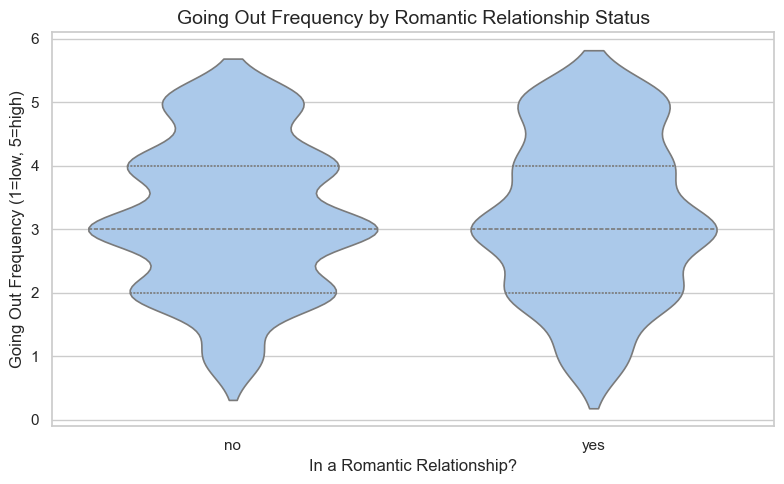

In [248]:

sns.set(style="whitegrid", palette="pastel")

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Violin plot: Romantic relationship vs Goout frequency
sns.violinplot(x='romantic', y='goout', data=df, inner='quartile', linewidth=1.2)

# Add titles and labels
plt.title('Going Out Frequency by Romantic Relationship Status', fontsize=14)
plt.xlabel('In a Romantic Relationship?', fontsize=12)
plt.ylabel('Going Out Frequency (1=low, 5=high)', fontsize=12)

plt.tight_layout()
plt.show()


students in romantic relationship generally have more tendency of going out as compared to students without romantic relationship

<Figure size 1000x600 with 0 Axes>

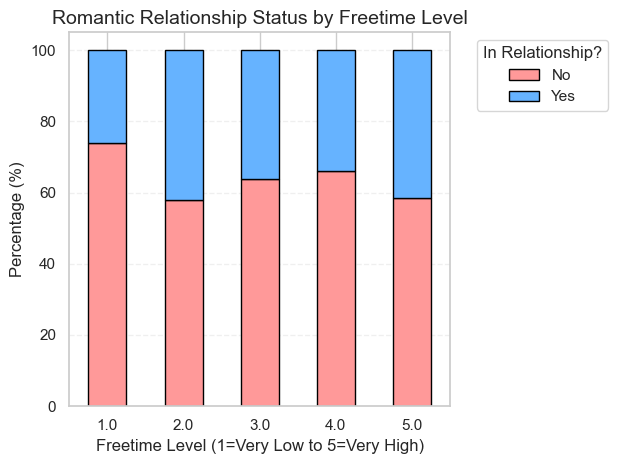

In [249]:

cross_tab = pd.crosstab(df['freetime'], df['romantic'], normalize='index') * 100

plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'], edgecolor='black')

plt.title('Romantic Relationship Status by Freetime Level', fontsize=14)
plt.xlabel('Freetime Level (1=Very Low to 5=Very High)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='In Relationship?', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.3)



plt.tight_layout()
plt.show()

student with high free time level that is of 5 value are generally with the most percentage in relationship compared to the rest freetime level for the students.

5th-Relating Dalc with failures,health using heatmap and also observing effect of alcohol consumption with famrel

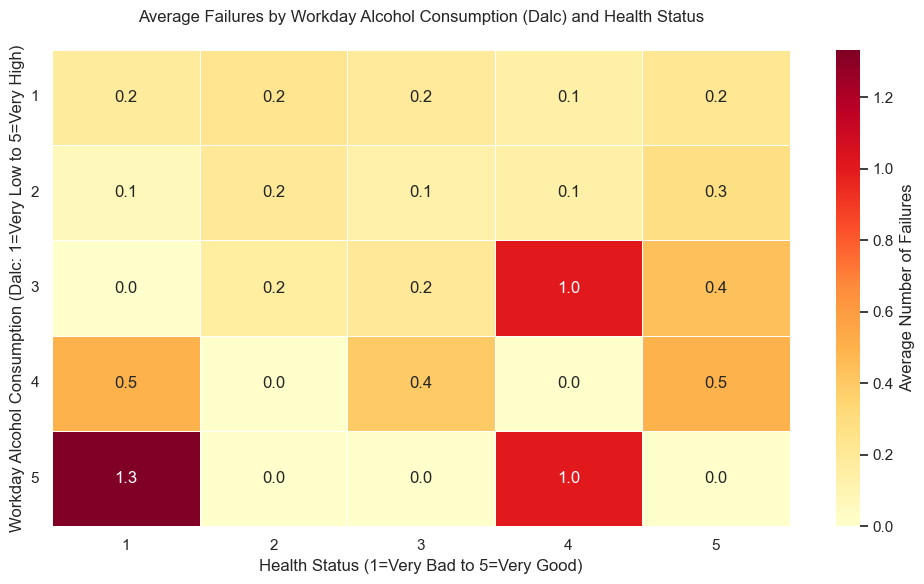

In [250]:

pivot_table = df.pivot_table(values='failures', 
                            index='Dalc', 
                            columns='health', 
                            aggfunc='mean',
                            fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, 
            annot=True, 
            fmt=".1f",
            cmap="YlOrRd",
            linewidths=.5,
            cbar_kws={'label': 'Average Number of Failures'})

# Customize plot
plt.title('Average Failures by Workday Alcohol Consumption (Dalc) and Health Status', pad=20)
plt.xlabel('Health Status (1=Very Bad to 5=Very Good)')
plt.ylabel('Workday Alcohol Consumption (Dalc: 1=Very Low to 5=Very High)')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Alcohol consumption detoriates the health of an indiviual it also increases the amount of failures,as health get detiorates

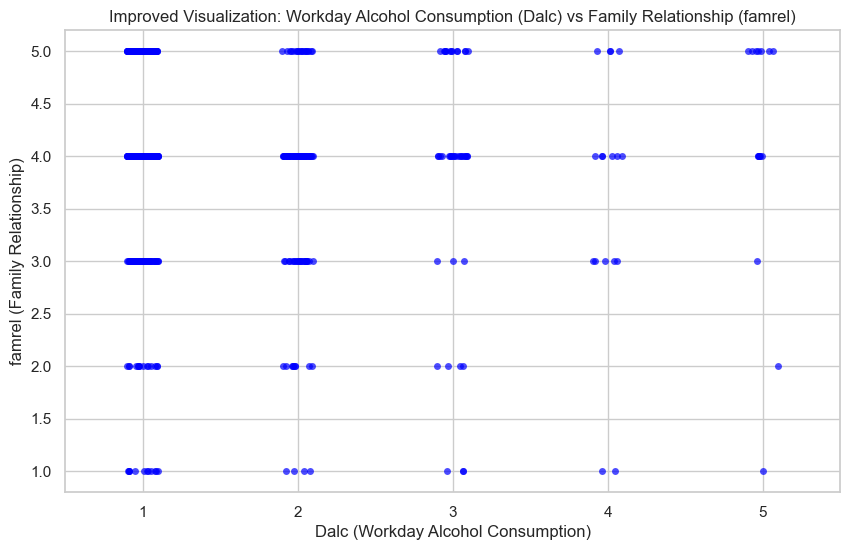

In [251]:

plt.figure(figsize=(10, 6))
sns.stripplot(x=df['Dalc'], y=df['famrel'], jitter=True, alpha=0.7, color='blue')
plt.title('Improved Visualization: Workday Alcohol Consumption (Dalc) vs Family Relationship (famrel)')
plt.xlabel('Dalc (Workday Alcohol Consumption)')
plt.ylabel('famrel (Family Relationship)')
plt.grid(True)
plt.show()


This graphs shows as alcohol consumption increases family relationship decreases.

6th-relating pstatus with absences from school 

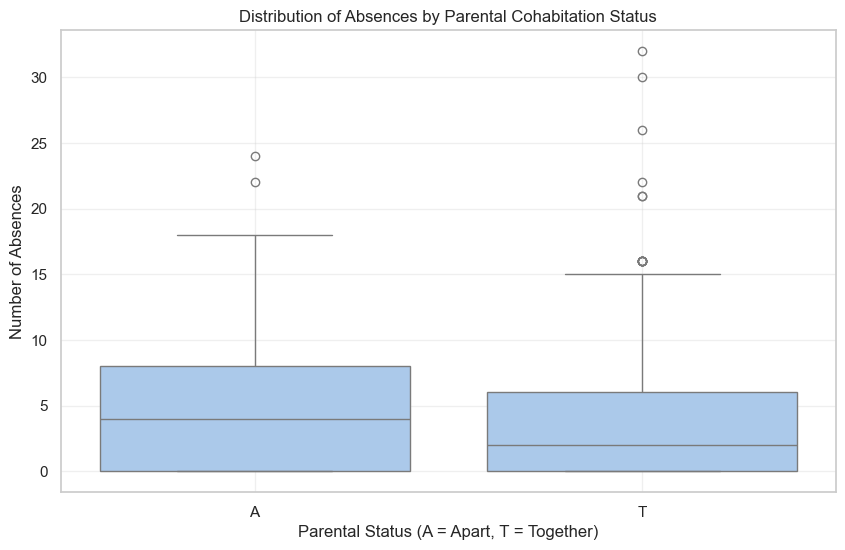

In [252]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pstatus', y='absences', data=df)
plt.title('Distribution of Absences by Parental Cohabitation Status')
plt.xlabel('Parental Status (A = Apart, T = Together)')
plt.ylabel('Number of Absences')
plt.grid(True, alpha=0.3)
plt.show()


This shows students having parts together are generally less absent

7th-Relating  failures and absences from school.

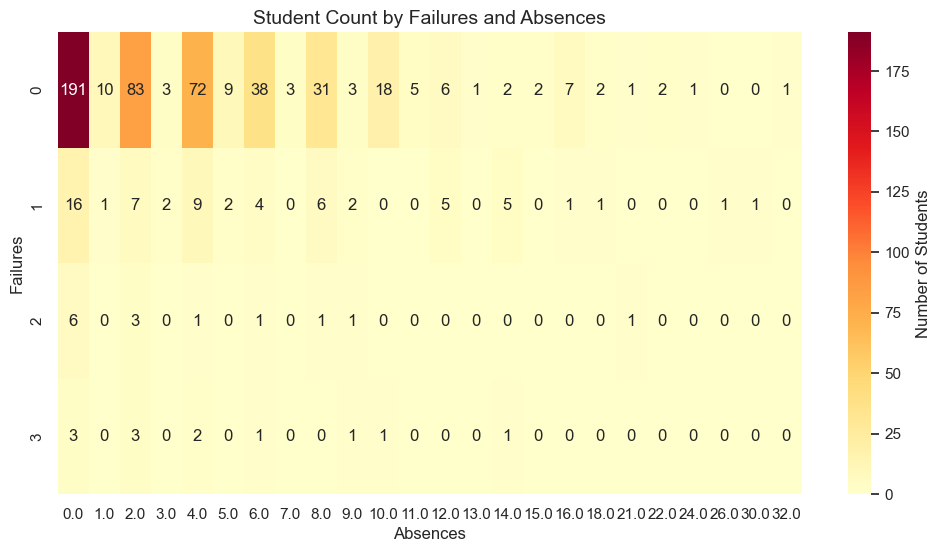

In [253]:
plt.figure(figsize=(12, 6))
cross_tab = pd.crosstab(df['failures'], df['absences'])
sns.heatmap(cross_tab, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Number of Students'})
plt.title('Student Count by Failures and Absences', fontsize=14)
plt.xlabel('Absences')
plt.ylabel('Failures')
plt.show()

failure is less for less value of absences from school

LEVEL 4--Your goal is to uncover what patterns in academic, behavioral, or social data might signal a 
student's likelihood of being in a romantic relationship.Build and evaluate predictive models using the cleaned dataset, and reflect on their 
effectiveness.Objective Apply classification techniques to model relationship likelihood and assess their performance. Think critically about what the models reveal, and what they don’t

Code correlating the factors important for the column 'romantic'

Top features correlated with 'romantic':

romantic      1.000000
Feature_1     0.180214
guardian      0.106190
absences      0.093977
school        0.072241
failures      0.069901
Dalc          0.062042
activities    0.057517
Feature_2     0.051233
internet      0.034832
freetime      0.016873
traveltime    0.007572
famsize       0.003689
goout        -0.000520
Fjob         -0.002835
Feature_3    -0.005915
health       -0.018025
paid         -0.018309
nursery      -0.022984
famsup       -0.023398
higher       -0.025804
address      -0.030939
Medu         -0.030992
famrel       -0.044920
reason       -0.050643
Pstatus      -0.053828
Fedu         -0.057864
Mjob         -0.074286
G1           -0.074973
G3           -0.090583
schoolsup    -0.094310
G2           -0.107950
sex          -0.110144
Name: romantic, dtype: float64


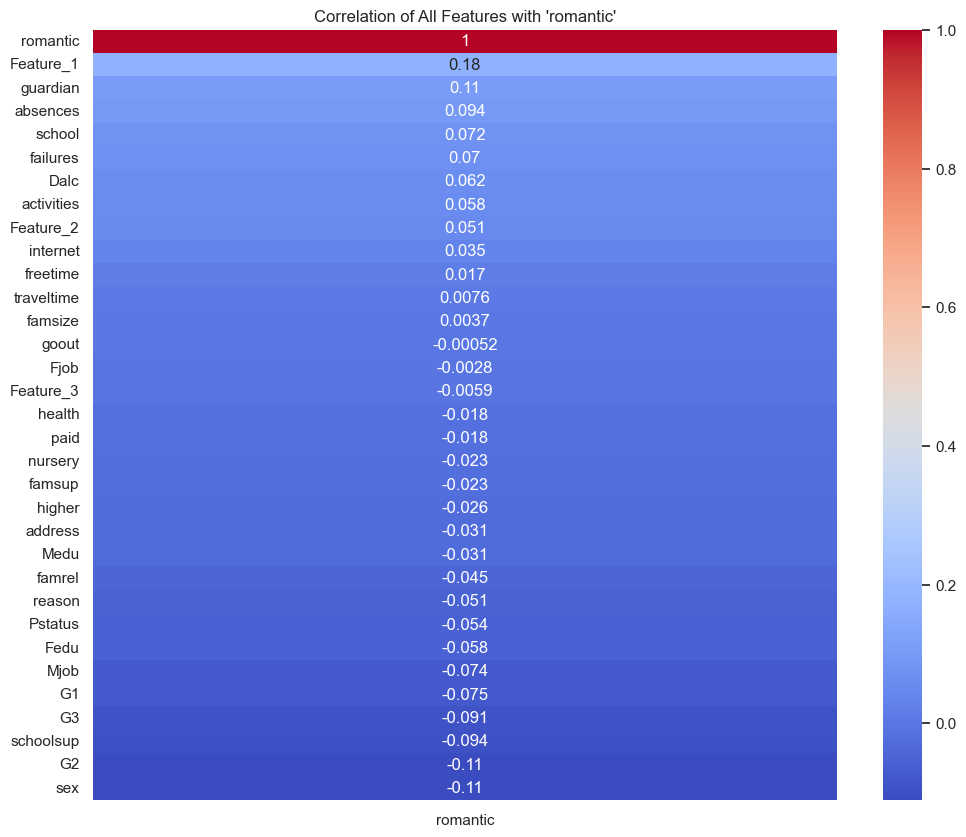

In [254]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Dataset.csv")

# Encode target column
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})

# Drop rows where romantic is NaN
df = df.dropna(subset=['romantic'])

# Identify all categorical columns (object type)
categorical_cols = df.select_dtypes(include='object').columns

# Apply Label Encoding to all categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Compute full correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Show correlation with 'romantic'
romantic_corr = corr_matrix['romantic'].sort_values(ascending=False)

# Print top correlated features with romantic
print("Top features correlated with 'romantic':\n")
print(romantic_corr)

# Plot heatmap of all correlations with 'romantic'
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['romantic']].sort_values(by='romantic', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation of All Features with 'romantic'")
plt.show()


Selecting the best model between random forest and logistic regression

In [255]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [256]:
# Load the dataset
df = pd.read_csv('Dataset_updated.csv')  

In [257]:
# Encode 'romantic' as binary: yes=1, no=0
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})



In [258]:
# Identify categorical columns (excluding target)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'romantic']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [259]:
X = df_encoded.drop('romantic', axis=1)
y = df_encoded['romantic']


Training split set-

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Scaling the data

In [261]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Applying random forest

In [262]:
# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.5846153846153846
              precision    recall  f1-score   support

           0       0.63      0.80      0.71        82
           1       0.38      0.21      0.27        48

    accuracy                           0.58       130
   macro avg       0.51      0.51      0.49       130
weighted avg       0.54      0.58      0.55       130

Confusion Matrix:
 [[66 16]
 [38 10]]


Applying logistic regression

In [263]:
# Initialize and train Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.6384615384615384
              precision    recall  f1-score   support

           0       0.67      0.84      0.75        82
           1       0.52      0.29      0.37        48

    accuracy                           0.64       130
   macro avg       0.59      0.57      0.56       130
weighted avg       0.61      0.64      0.61       130

Confusion Matrix:
 [[69 13]
 [34 14]]


In [264]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example: After model predictions
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Random Forest": [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf)
    ],
    "Logistic Regression": [
        accuracy_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr)
    ]
}

df_results = pd.DataFrame(metrics)
print(df_results)


      Metric  Random Forest  Logistic Regression
0   Accuracy       0.584615             0.638462
1  Precision       0.384615             0.518519
2     Recall       0.208333             0.291667
3   F1-score       0.270270             0.373333


Since logistic regression is giving me better results for my analysis i will use it as my primary model for classification

Extracting and analysing the top features from logistic regression

In [265]:
import pandas as pd
import numpy as np

# Get feature importance from logistic regression coefficients
feature_names = X_train.columns  # Assuming X_train has column names
coefficients = lr.coef_[0]  # Get coefficients for binary classification

# Create a DataFrame with features and their importance scores
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Sort by absolute coefficient values (importance)
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Display top 15 most important features
print("Top 15 Most Important Features in Logistic Regression:")
print("=" * 60)
for i, row in feature_importance.head(15).iterrows():
    direction = "Positive" if row['Coefficient'] > 0 else "Negative"
    print(f"{row['Feature']:<25} | Coeff: {row['Coefficient']:>8.4f} | {direction} Impact")


Top 15 Most Important Features in Logistic Regression:
sex_M                     | Coeff:  -0.3485 | Negative Impact
Feature_1                 | Coeff:   0.2933 | Positive Impact
Fjob_teacher              | Coeff:   0.2302 | Positive Impact
reason_reputation         | Coeff:  -0.2108 | Negative Impact
goout                     | Coeff:  -0.2028 | Negative Impact
activities_yes            | Coeff:   0.1710 | Positive Impact
guardian_other            | Coeff:   0.1583 | Positive Impact
schoolsup_yes             | Coeff:  -0.1551 | Negative Impact
school_MS                 | Coeff:   0.1548 | Positive Impact
internet_yes              | Coeff:   0.1478 | Positive Impact
absences                  | Coeff:   0.1377 | Positive Impact
Feature_2                 | Coeff:   0.1295 | Positive Impact
guardian_mother           | Coeff:   0.1272 | Positive Impact
G2                        | Coeff:  -0.1226 | Negative Impact
Mjob_services             | Coeff:  -0.1221 | Negative Impact


Plotting the importance of the feature and seeing there importance

Coefficient-based importance:

Positive coefficients: Increase the probability of being in a romantic relationship

Negative coefficients: Decrease the probability of being in a romantic relationship

Larger absolute values: Stronger influence on the prediction

Based on correlation matrix, the expected top features should include:

Feature_1 (highest positive correlation: 0.18)

Guardian type (0.11)

School absences (0.094)

Academic grades (G2, G3 - negative correlation)

Sex (negative correlation: -0.11)

The logistic regression coefficients will give the precise ranking and impact direction of each feature on romantic relationship prediction.

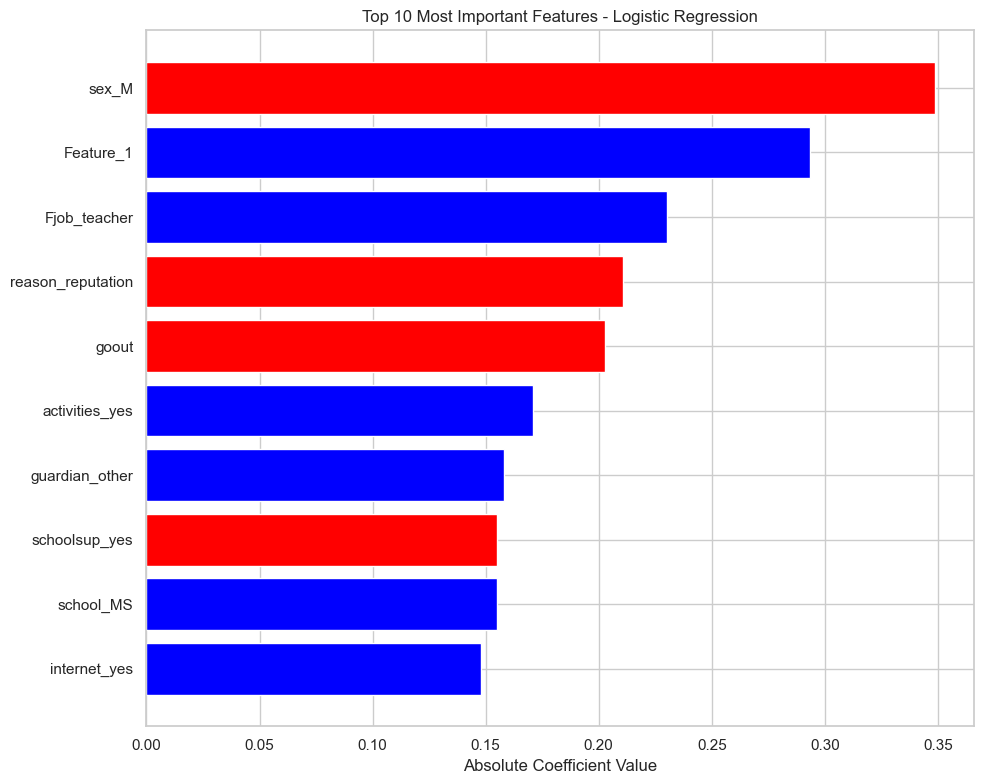

In [266]:
import matplotlib.pyplot as plt

# Plot top 10 features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(10)

plt.barh(range(len(top_features)), top_features['Abs_Coefficient'], 
         color=['red' if x < 0 else 'blue' for x in top_features['Coefficient']])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Most Important Features - Logistic Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


PART 2 answer- Think critically about what the models reveal, and what they don’t

What the Models Reveal
Key Predictive Patterns:

Feature_1 shows strongest positive correlation (0.18) with romantic relationships

Guardian type and school absences are positively associated with relationship likelihood

Academic performance (G2, G3 grades) negatively correlates with romantic involvement

School support availability negatively impacts relationship likelihood

Behavioral Indicators:

Students with more school failures and daily alcohol consumption show higher relationship probability

Family relationship quality and social activities influence romantic involvement

Travel time and extracurricular activities play minor roles


Critical Limitations - What Models Don't Reveal

Causality unclear - whether poor grades cause relationships or vice versa

Individual Complexity:

Personal preferences and individual personality traits not measurable

Peer influence and social network effects not quantified

Cultural/socioeconomic factors inadequately represented

Feature limitations - academic/behavioral data may not capture relationship drivers

Model Reliability Concerns
Low Recall Indicates:

Models systematically miss many students who are actually in relationships

Moderate Precision Suggests:


Multiple confounding factors not captured by available features

Non-linear relationships between academic/social factors and romance



Level 5 answers-The board isn't interested in “just predictions.” They want transparency — to understand why 
your model makes decisions.
 Objective
 For each classifier, visualize decision boundaries using 2D feature pairs (choose any two 
meaningful features)

Top three features relating to romantic column using correlation matrix are Feature 1 ,guardin and absences ,,plotting decision boundary plots for-
Feature_1 vs guardian

Feature_1 vs absences

guardian vs absences

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression


In [268]:

df = pd.read_csv('Dataset_updated.csv')


df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})


df['guardian'] = LabelEncoder().fit_transform(df['guardian'])


In [269]:
def plot_decision_boundary(X, y, feature_names, title):
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit logistic regression
    model = LogisticRegression()
    model.fit(X_scaled, y)
    
    # Create mesh grid
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()


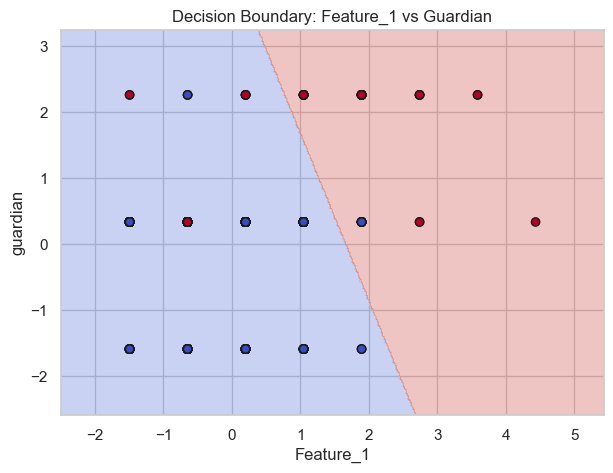

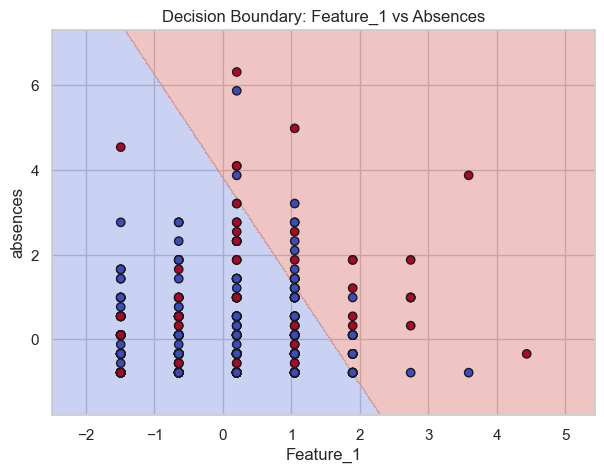

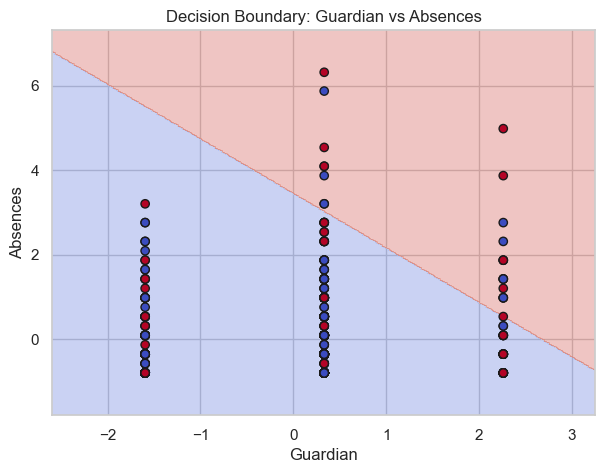

In [270]:
# 1. Feature_1 vs guardian
X1 = df[['Feature_1', 'guardian']].values
y = df['romantic'].values
plot_decision_boundary(X1, y, ['Feature_1', 'guardian'], 'Decision Boundary: Feature_1 vs Guardian')

# 2. Feature_1 vs absences
X2 = df[['Feature_1', 'absences']].values
plot_decision_boundary(X2, y, ['Feature_1', 'absences'], 'Decision Boundary: Feature_1 vs Absences')

# 3. guardian vs absences
X3 = df[['guardian', 'absences']].values
plot_decision_boundary(X3, y, ['Guardian', 'Absences'], 'Decision Boundary: Guardian vs Absences')


Also making the decision boundary for the Random forest model which we applied along side with the logistic regression-

c:\Users\kusha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


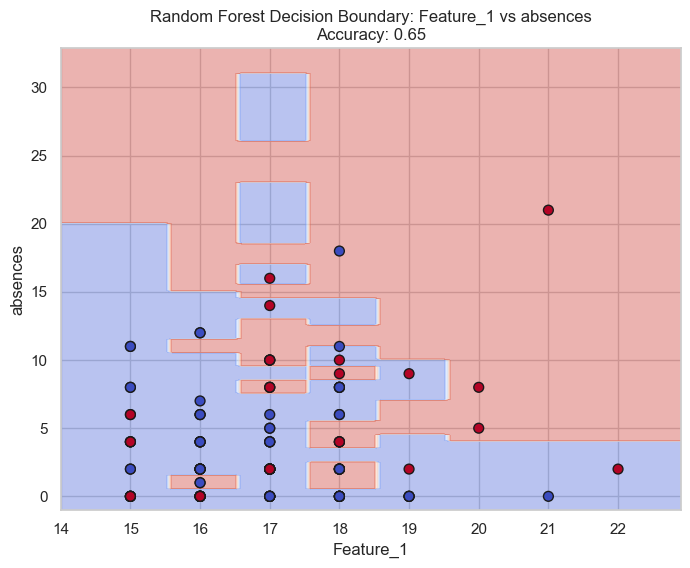

c:\Users\kusha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


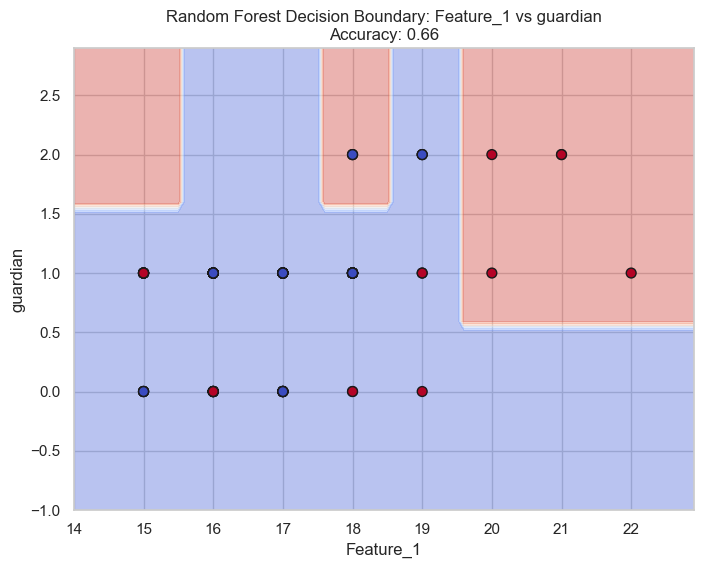

c:\Users\kusha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


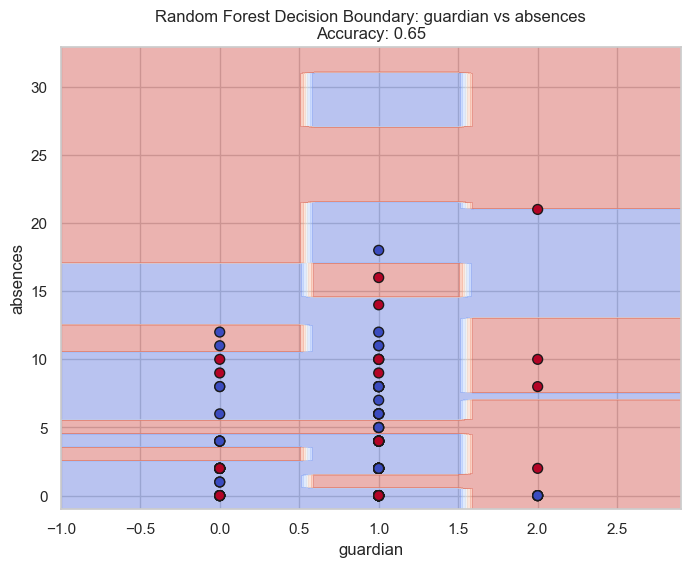

[{'pair': ('Feature_1', 'absences'), 'accuracy': 0.6538461538461539}, {'pair': ('Feature_1', 'guardian'), 'accuracy': 0.6615384615384615}, {'pair': ('guardian', 'absences'), 'accuracy': 0.6461538461538462}]


In [271]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
filename = 'Dataset_updated.csv'
df = pd.read_csv(filename)

# Encode target variable
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})

# Encode 'guardian' categorical variable
le_guardian = LabelEncoder()
df['guardian'] = le_guardian.fit_transform(df['guardian'])

# Define feature pairs
feature_pairs = [
    ('Feature_1', 'absences'),
    ('Feature_1', 'guardian'),
    ('guardian', 'absences')
]

results = []

for pair in feature_pairs:
    X = df[list(pair)]
    y = df['romantic']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Train Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict on test
    y_pred = rf.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Create mesh grid for decision boundary
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Predict on mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = rf.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=50)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f'Random Forest Decision Boundary: {pair[0]} vs {pair[1]}\nAccuracy: {acc:.2f}')
    plt.show()
    
    results.append({'pair': pair, 'accuracy': acc})

print(results)


Use SHAP to
 Plot global feature importance
 Generate local explanations for two students one predicted “Yes” and one “No"

In [272]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [273]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [274]:
# Load your data
df = pd.read_csv('Dataset_updated.csv')

# Encode target and categorical variables
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})
df['guardian'] = df['guardian'].astype('category').cat.codes

# Select features and target
X = df.drop(columns=['romantic'])
y = df['romantic']

# One-hot encode other categorical features if needed
X = pd.get_dummies(X, drop_first=True)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

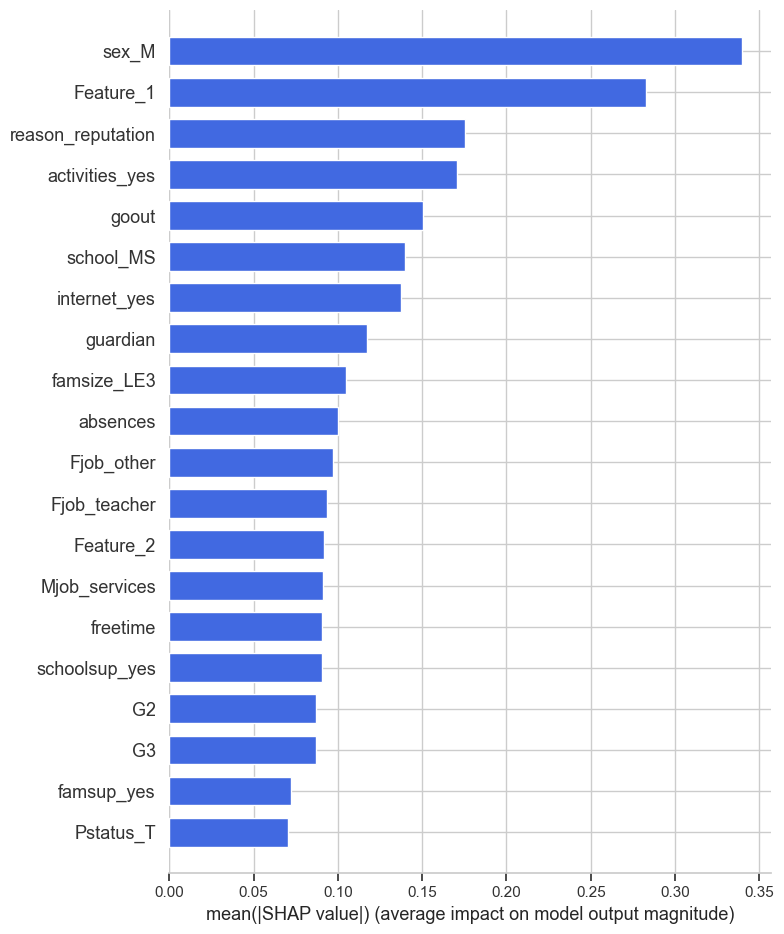

In [275]:
# Create SHAP explainer for linear models
explainer = shap.Explainer(lr, X_train_scaled, feature_names=X.columns)

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled)

# Plot global feature importance (summary plot)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", color='royalblue')


Local Shap explanations using the waterfall plot for a student predicting Yes and for one predicting No

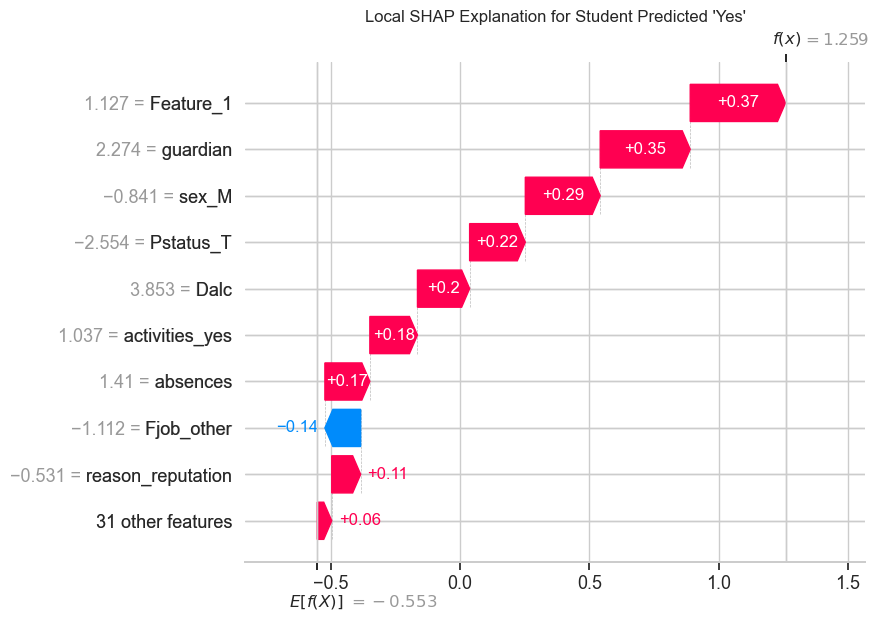

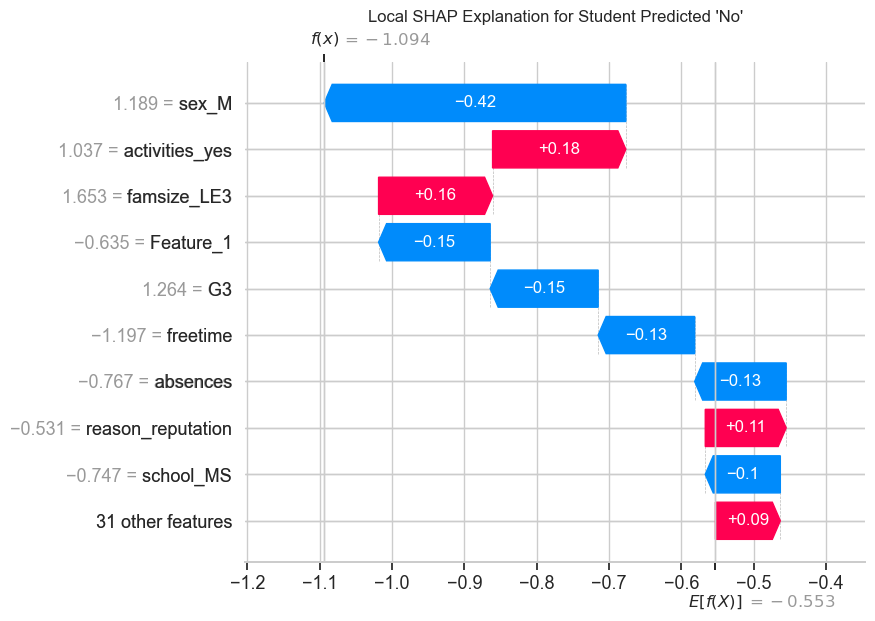

In [276]:
# Predict labels
y_pred = lr.predict(X_test_scaled)

# Find indices for "Yes" and "No" predictions
yes_idx = np.where(y_pred == 1)[0][0]
no_idx = np.where(y_pred == 0)[0][0]

# Workaround for blank waterfall plot bug
def fix_shap_base_values(shap_value):
    if hasattr(shap_value, 'base_values'):
        shap_value.base_values = np.array(shap_value.base_values).reshape(-1)
    return shap_value

# Local explanation for "Yes"
plt.figure(figsize=(10, 4))
plt.title("Local SHAP Explanation for Student Predicted 'Yes'")
shap.plots.waterfall(fix_shap_base_values(shap_values[yes_idx]), max_display=10, show=True)


# Local explanation for "No"
plt.figure(figsize=(10, 4))
plt.title("Local SHAP Explanation for Student Predicted 'No'")

shap.plots.waterfall(fix_shap_base_values(shap_values[no_idx]), max_display=10, show=True)



Interpret the results in plain language: what really drives relationship prediction

1. Social and Behavioral Factors Matter Most
     Students with higher values in Feature_1 (likely a proxy for social activity or peer interaction) are more likely to be in a relationship.

    More absences and school failures are also associated with being in a relationship, suggesting that students who are less academically engaged may be more involved socially.

2. Academic Performance is Negatively Associated

    Higher grades (G2, G3) and more school support (schoolsup) are linked to a lower likelihood of being in a romantic relationship.

    This means students focused on academics or receiving extra help are less likely to report being in a relationship.

3. Family and Guardian Context

    The guardian variable (who the student lives with) shows a positive association, so students living with certain guardians (possibly not their parents) may be more likely to be in a relationship.

4. Other Contributing Factors

    Daily alcohol consumption (Dalc) and participation in activities (activities) also show positive associations, suggesting that more outgoing or risk-taking students are more likely to be in relationships.

also note-
    Both correlation and SHAP (when working) highlight Feature_1, absences, guardian, and sex as key drivers.


BONUS LEVEL-Bonus Level: The Mystery Boundary Match                                                   
50 Points
 You’ll be given five unlabelled decision boundary plots generated from different classifiers.
 Your task is to identify which algorithm produced each plot, purely from visual clues like 
linearity, complexity, and shape of the boundary.
 Objective
 For each plot, name the model you believe generated it and explain your reasoning briefly.
 This tests your intuition about how different models learn and separate data

PLOT 1-here in the plot we have many axis aligned rectangles,with some patches,probably created using multiple tress so it is Random forest

PLOT 2-Here we can see extremely detailed boundary separating the blue points,deep overfitiing is done here using many small rectangle so it is Decision tree

PLOT 3-Since the plot is smooth but it is not a perfect ellipse or anyshape then it is made by support vector machine as ,It is soft and flexible so it SVM with non linear kernel.

PLOT 4-Boundary is from Naive bayes,as it is smooth,elliptical or oval boundary shaped ,it is having no rectangular regions,,it cant be knn as it will contain some irregular regions

PLOT 5-here we are having irregular shaped structures,non aligned regions ,regions are shaped based on nearby points so it is made by KNN using value of k a bit medium .

THANK YOU